Name: 
Type: DiGraph
Number of nodes: 182
Number of edges: 780
Average in degree:   4.2857
Average out degree:   4.2857

Resolve plurals :
 Name: 
Type: DiGraph
Number of nodes: 182
Number of edges: 780
Average in degree:   4.2857
Average out degree:   4.2857

 []
Resolved plurals after:
 Name: 
Type: DiGraph
Number of nodes: 182
Number of edges: 780
Average in degree:   4.2857
Average out degree:   4.2857


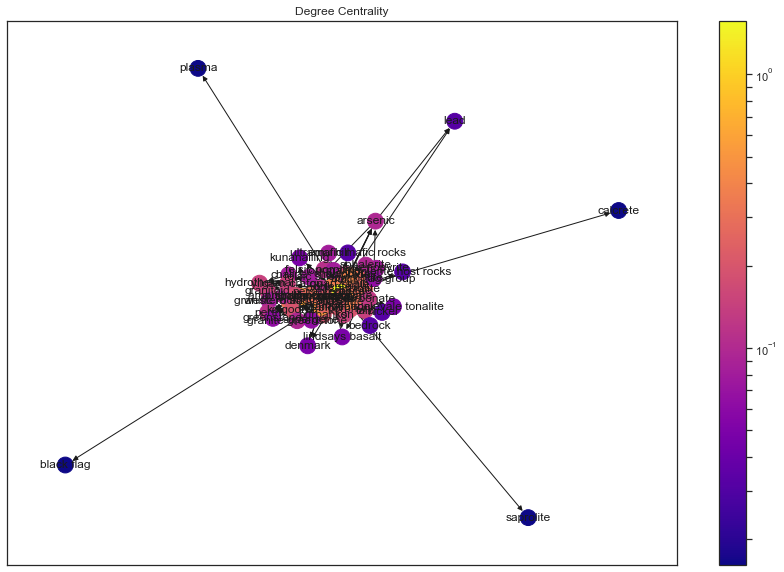

Ego for  gold :  Name: 
Type: DiGraph
Number of nodes: 63
Number of edges: 403
Average in degree:   6.3968
Average out degree:   6.3968

NODES:
('felsic porphyry', {'group': 'ROCK', 'degree': 7})
('dolerite host rocks', {'group': 'ROCK', 'degree': 2})
('western australia', {'group': 'LOCATION', 'degree': 21})
('chalice', {'group': 'LOCATION', 'degree': 5})
('porphyry', {'group': 'ROCK', 'degree': 12})
('quartz', {'group': 'MINERAL', 'degree': 47})
('kunanalling', {'group': 'LOCATION', 'degree': 3})
('iron', {'group': 'MINERAL', 'degree': 9})
('nickel', {'group': 'MINERAL', 'degree': 2})
('australia', {'group': 'LOCATION', 'degree': 6})
('granitoid', {'group': 'ROCK', 'degree': 9})
('yilgarn craton', {'group': 'LOCATION', 'degree': 9})
('basalt', {'group': 'ROCK', 'degree': 32})
('coolgardie', {'group': 'LOCATION', 'degree': 37})
('arsenopyrite', {'group': 'MINERAL', 'degree': 5})
('shale', {'group': 'ROCK', 'degree': 10})
('chlorite', {'group': 'MINERAL', 'degree': 18})
('talc', {'grou

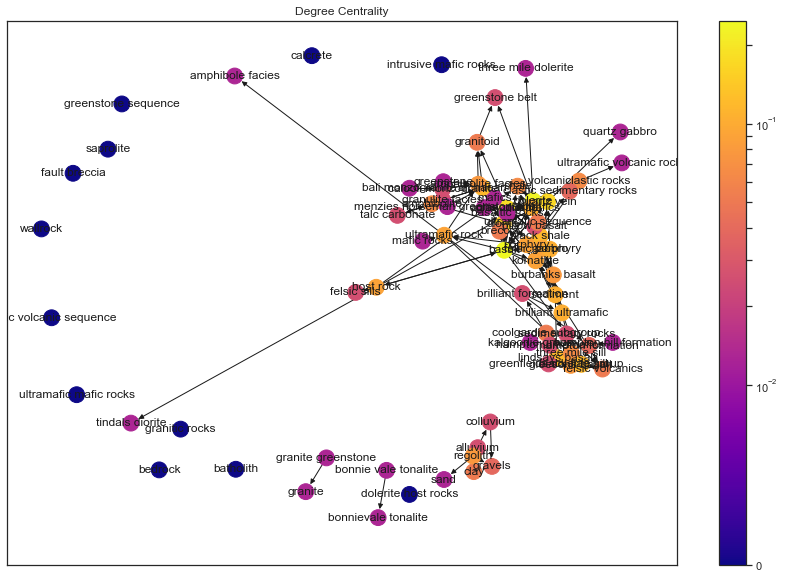

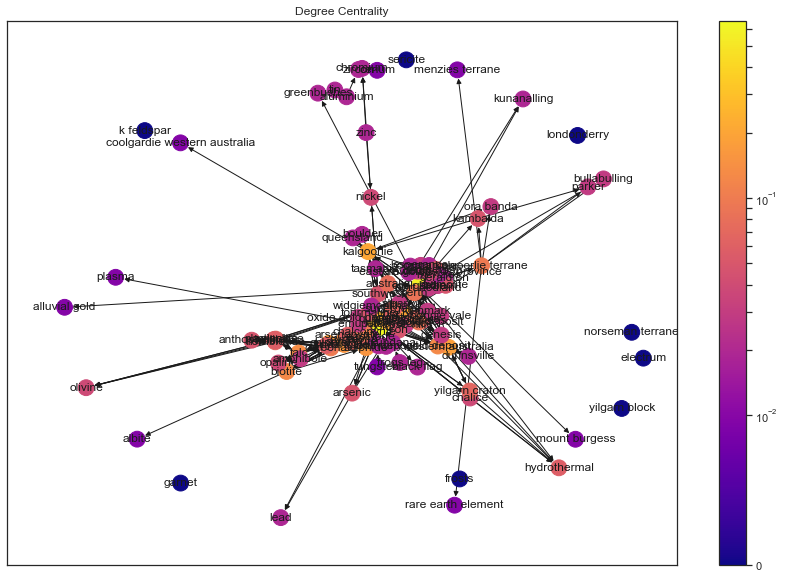

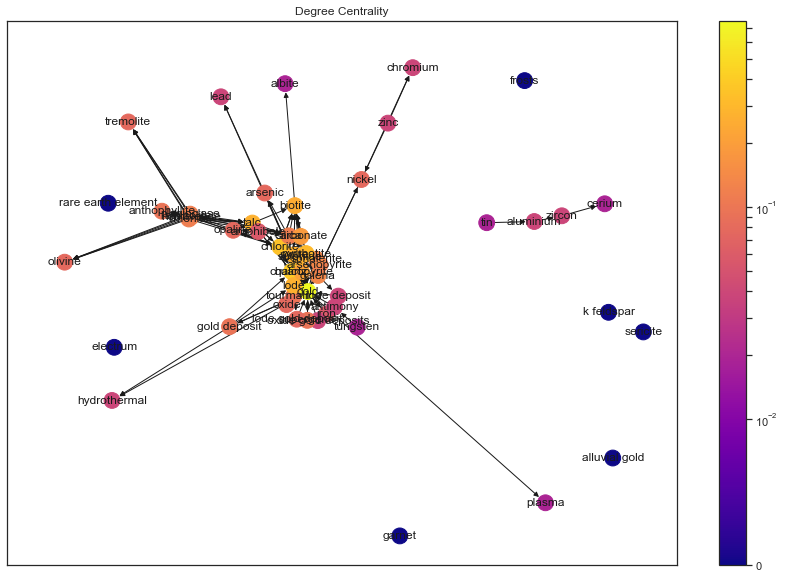

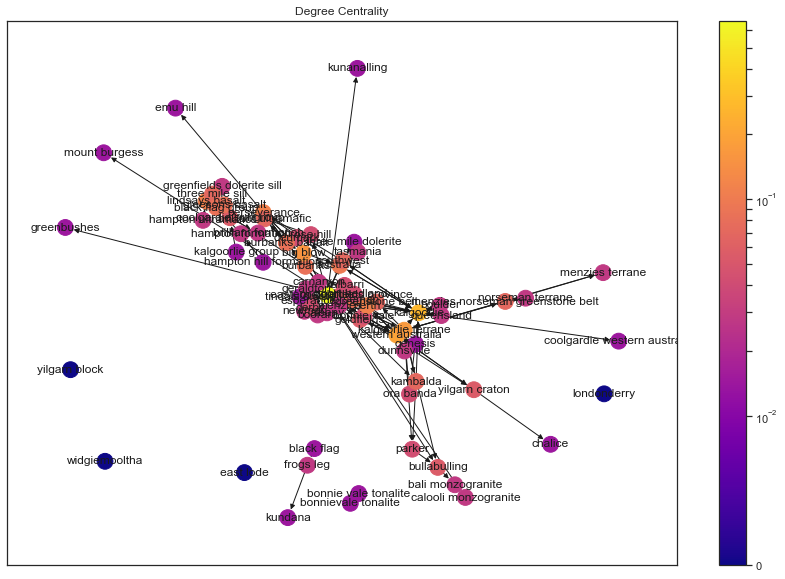

DONE. duration =  00:00:05
Vocabulary size (pre-trained model) =  3000000


KeyboardInterrupt: 

In [1]:
%matplotlib inline
# NLTK (for nlp), Gensim (for Word2Vec), SkLearn (for a clustering algorithm), Pandas and Numby (for data structures and processing)
import nltk.data;
from gensim.models import word2vec;

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

import pandas as pd;
import numpy as np;
import networkx as nx

import os;
import re;
import logging;
import time;
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
from itertools import cycle;
"""
import os, sys
#'/home/user/example/parent/child'
current_path = os.path.abspath('.')
#'/home/user/example/parent'
parent_path = os.path.dirname(current_path)
sys.path.append(parent_path)
"""
from analyse import load_graph, resolve_plurals

import gensim
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [90]:
FILENAME = r'Files/10_iron_ore_graphs/a075345_c125_2004_2007a_14419765.json'

graph = load_graph(FILENAME)
#print(nx.info(graph))
g = resolve_plurals(graph)

triples = []
relations = []
for s, t, d in g.edges(data=True):
    triples.append([s, d['label'], t])
    rels = d['label'].split(',')
    relations = relations + rels
print('Num triples = ', len(triples))
print('Relations = ', set(relations))

Vocabulary size =  3000000

Resolve plurals :
 Name: 
Type: DiGraph
Number of nodes: 112
Number of edges: 447
Average in degree:   3.9911
Average out degree:   3.9911

 []
Resolved plurals after:
 Name: 
Type: DiGraph
Number of nodes: 112
Number of edges: 447
Average in degree:   3.9911
Average out degree:   3.9911
Num triples =  447
Relations =  {'', 'vary from', 'including at', 'by', 'locked within', 'conditioned', 'across', 'interlocking', 'on', 'grading into', 'contained', 'podded', 'with interbedded', 'drilled at', 'bedded', 'composed of', 'used at', 'intruded by', 'burnt', 'prospects within', 'compared to', 'to hematite', 'confirming', 'fired', 'to', 'spread throughout', 'structured', 'from', 'within', 'characterised', 'silcrete and calcareous sediments)', 'for fortescue metals group limited', 'located within', 'can refer to', 'mix to', 'hosted', 'belongs to', 'for', 'overlies', 'passing through', '(commonly disseminated throughout the christmas creek deposit)', 'note', 'overprin

In [83]:
sentences = []
rel_words_list = []
for r in relations:
    if r:
        sentences.append(r.split())
        rel_words_list += r.split()
sentences[0:10]

#save all words for relations
df_words = pd.DataFrame(set(sorted(rel_words_list)), columns=["colummn"])
df_words.to_csv('relation_words_list.csv', index=False)

[['in'],
 ['of'],
 ['in'],
 ['of'],
 ['characterised'],
 ['across'],
 ['in'],
 ['produced', 'in'],
 ['in'],
 ['in']]

In [130]:
import spacy
# python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

stopwords = ['could', 'would', 'is', 'a', 'can', 'may', 'should']

sentences = []
unique_rels = {}
rels_dict = {} # mean vector for the entire sentence

for r in relations:    
    if not r or r'(' in r or r')' in r:   #print(' -   direct_connection')
        pass
    elif any(char.isdigit() for char in r):
        pass
    #elif r == 'is_parent_of':
    #    rels_dict[r] = 'contain'
    #    #print('contain')
    #elif r == 'is_current_of':
    #    rels_dict[r] = 'rename'
    #    #print('contain')
    else:
        resultwords  = [word for word in r.split() if word.lower() not in stopwords]
        result = ' '.join(resultwords)
        doc = nlp(result)
        rel_key = [token.lemma_ for token in doc if (token.pos_ == 'VERB' or token.pos_ == 'ADP')] # To do: if only verb or adp
        #print(rel_key)
        sentences.append(rel_key)
        k = '_'.join(rel_key)
        if k in unique_rels.keys():
            unique_rels[k] =  unique_rels[k] + 1
        else:
            unique_rels[k] = 1
            
        # Get the mean vector for the entire sentence (useful for sentence classification etc.)
        rels_dict[k] = doc.vector
        #print (r, [[token.lemma_, token.pos_] for token in doc])        
    #words = r.split()
    #for w in words:
    #    doc = nlp(w)
    #    print ([[token.lemma_, token.pos_] for token in doc])
print(len(sentences), len(unique_rels))
print(sorted(unique_rels.items(), key=lambda item: item[1]))

271 68
[('across', 1), ('term', 1), ('compose_of', 1), ('find_at', 1), ('finish_at', 1), ('fire', 1), ('outperform', 1), ('at_vary', 1), ('drill_at', 1), ('for_band', 1), ('along', 1), ('mix_with', 1), ('fill', 1), ('identify_in', 1), ('grade_into', 1), ('vary_from', 1), ('blend_with', 1), ('lock_within', 1), ('note', 1), ('spread_throughout', 1), ('overprint_by', 1), ('pass_through', 1), ('bed', 1), ('include_at', 1), ('conduct', 1), ('result_from', 1), ('by', 1), ('compare_with', 1), ('condition_compare_to', 1), ('fire_in', 1), ('characterise', 2), ('produce_in', 2), ('overlie', 2), ('use_at', 2), ('condition', 2), ('confirm', 2), ('locate_within', 2), ('refer_to', 2), ('occur_at', 2), ('resemble', 2), ('identify_at', 2), ('mineralise', 2), ('characterise_by', 2), ('structure', 2), ('tend', 2), ('host', 2), ('derive', 2), ('at', 3), ('interbedde_with', 3), ('become', 3), ('contain', 3), ('enrich', 4), ('intrude_by', 4), ('consist_of', 4), ('interlock', 4), ('burn', 4), ('belong_to', 

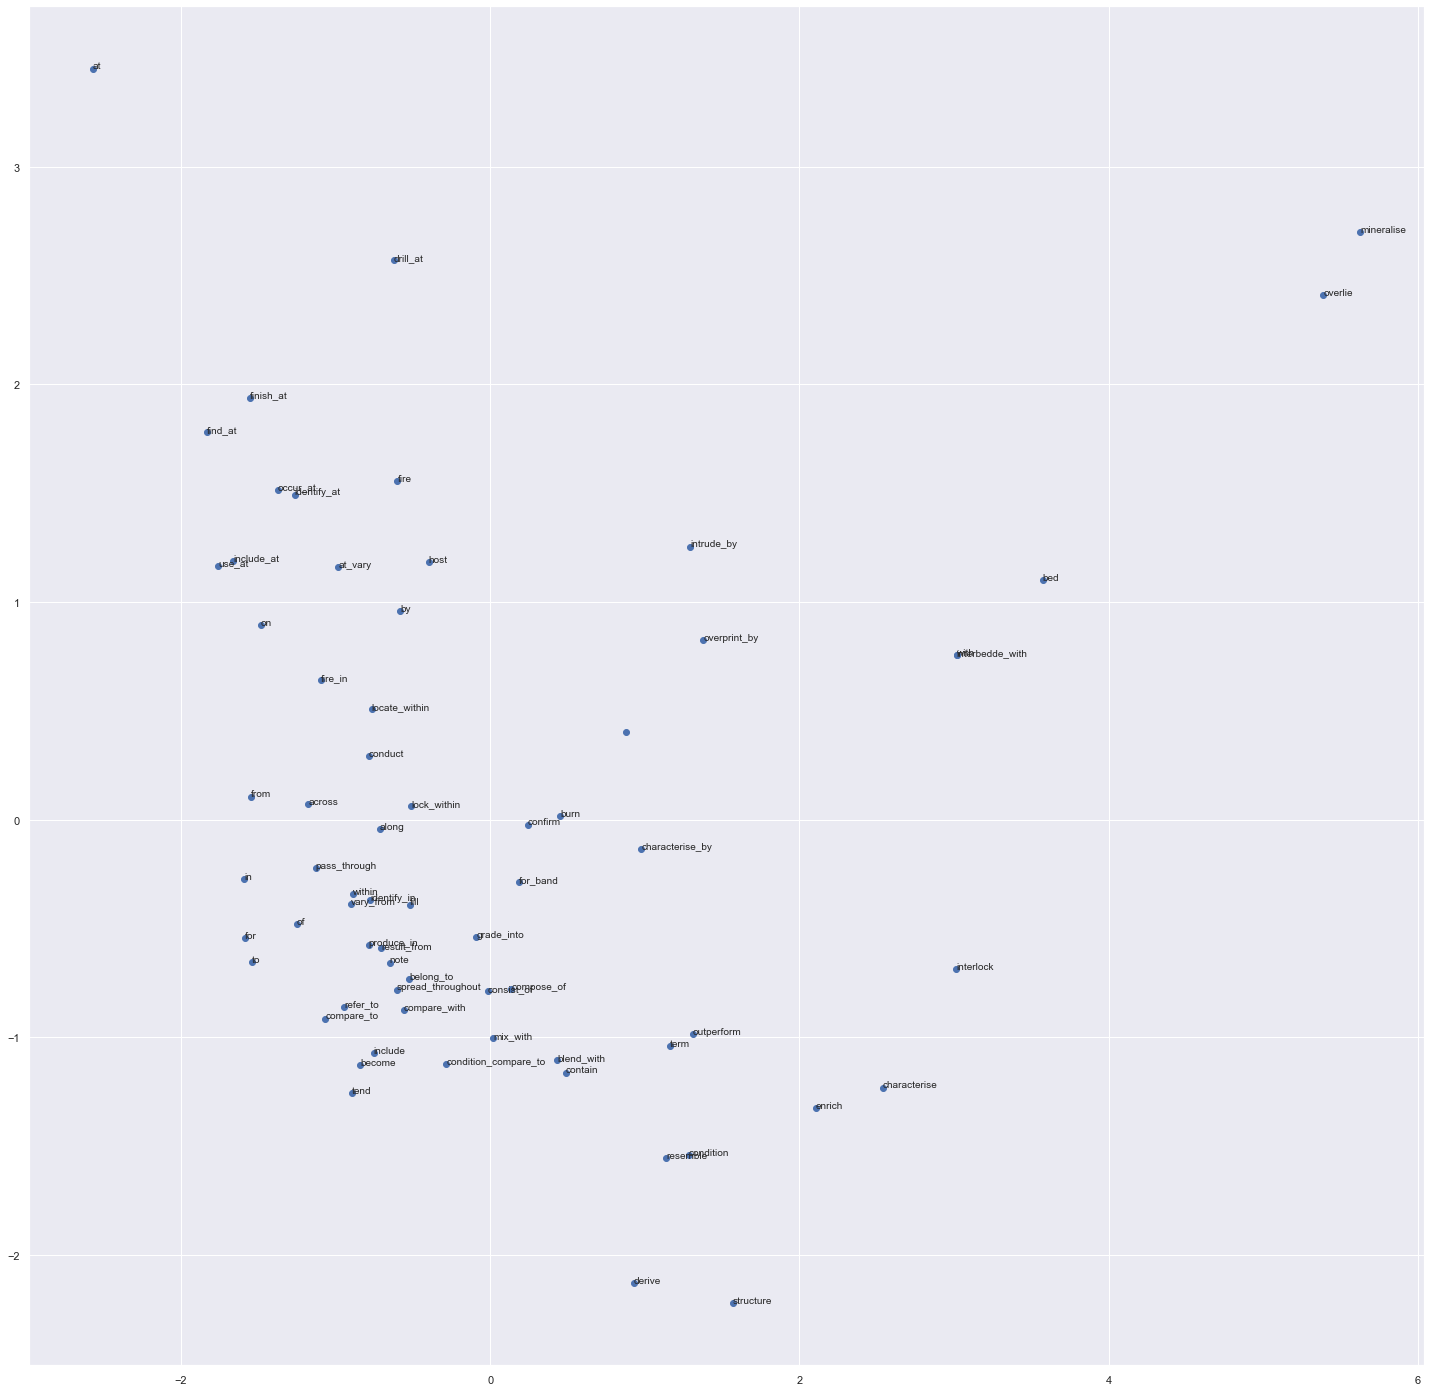

In [131]:
# fit a 2d PCA model to the vectors
Y = list(rels_dict.values())
#print(Y[0:3])
pca = PCA(n_components=2)
result = pca.fit_transform(Y)

# create a scatter plot of the projection
figure(figsize=(25,25))
plt.scatter(result[:, 0], result[:, 1])
words = list(rels_dict.keys())
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.savefig('verbs_plot.png')
plt.show()

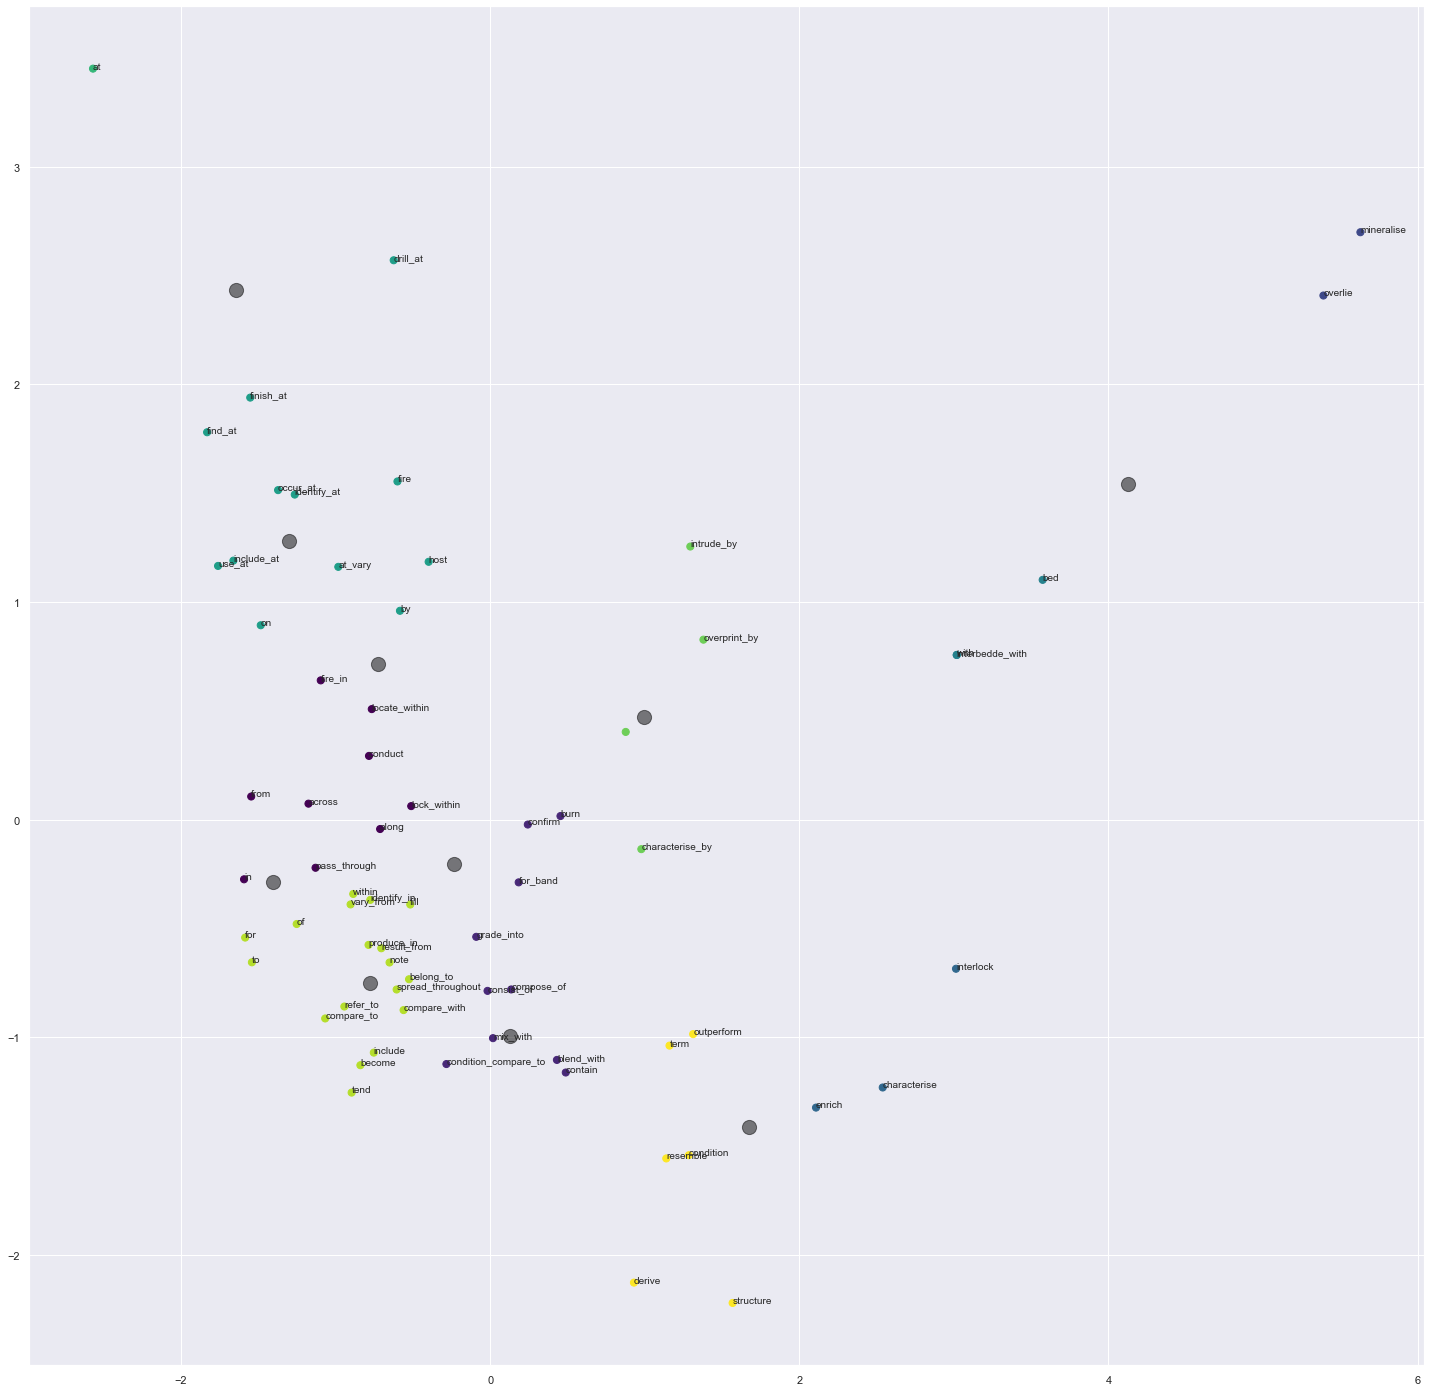

In [167]:
from sklearn.metrics import pairwise_distances_argmin
"""
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(result, 10)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

"""
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    y_kmeans = kmeans_clustering.fit_predict(word_vectors);
    
    figure(figsize=(25,25))
    plt.scatter(word_vectors[:, 0], word_vectors[:, 1], c=y_kmeans, s=50, cmap='viridis')
    
    centers = np.array([word_vectors[labels == i].mean(0) for i in range(num_clusters)]) # kmeans.cluster_centers_
    
    lbls = pairwise_distances_argmin(word_vectors, centers)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
        
    #for i, word in enumerate(lbls):
    #    pyplot.annotate(word, xy=(centers[i, 0], centers[i, 1]))
        
    #plt.scatter(centers[:, 0], centers[:, 1], c=lbls, cmap='viridis');
    
    plt.savefig('verbs_plot_clusters.png')
    plt.show()

    return kmeans_clustering.cluster_centers_ #, word_vectors;

centers = clustering_on_wordvecs(result, 10);
#print(centers)
#print(clusters)

2020-05-20 13:17:47,289 : INFO : collecting all words and their counts
2020-05-20 13:17:47,290 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-20 13:17:47,291 : INFO : collected 80 word types from a corpus of 334 raw words and 261 sentences
2020-05-20 13:17:47,293 : INFO : Loading a fresh vocabulary
2020-05-20 13:17:47,294 : INFO : min_count=1 retains 80 unique words (100% of original 80, drops 0)
2020-05-20 13:17:47,294 : INFO : min_count=1 leaves 334 word corpus (100% of original 334, drops 0)
2020-05-20 13:17:47,296 : INFO : deleting the raw counts dictionary of 80 items
2020-05-20 13:17:47,296 : INFO : sample=0.001 downsamples 80 most-common words
2020-05-20 13:17:47,297 : INFO : downsampling leaves estimated 105 word corpus (31.7% of prior 334)
2020-05-20 13:17:47,298 : INFO : estimated required memory for 80 words and 300 dimensions: 232000 bytes
2020-05-20 13:17:47,298 : INFO : resetting layer weights
2020-05-20 13:17:47,306 : INFO : training m

total_examples =  261


2020-05-20 13:17:47,647 : INFO : collecting all words and their counts
2020-05-20 13:17:47,648 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-20 13:17:49,326 : INFO : collected 3000000 word types from a corpus of 3000000 raw words and 1 sentences
2020-05-20 13:17:49,327 : INFO : Updating model with new vocabulary
2020-05-20 13:17:59,006 : INFO : New added 3000000 unique words (50% of original 6000000) and increased the count of 3000000 pre-existing words (50% of original 6000000)
2020-05-20 13:18:12,508 : INFO : deleting the raw counts dictionary of 3000000 items
2020-05-20 13:18:12,559 : INFO : sample=0.001 downsamples 0 most-common words
2020-05-20 13:18:12,560 : INFO : downsampling leaves estimated 6000000 word corpus (200.0% of prior 3000000)
2020-05-20 13:18:16,301 : INFO : estimated required memory for 6000000 words and 300 dimensions: 17400000000 bytes
2020-05-20 13:18:16,302 : INFO : updating layer weights
2020-05-20 13:19:08,753 : INFO : loa

train on examples ...
X[0:3] =  [[ 7.03125000e-02  8.69140625e-02  8.78906250e-02  6.25000000e-02
   6.93359375e-02 -1.08886719e-01 -8.15429688e-02 -1.54296875e-01
   2.07519531e-02  1.31835938e-01 -1.13769531e-01 -3.73535156e-02
   6.93359375e-02  7.81250000e-02 -1.03027344e-01 -9.76562500e-02
   4.41894531e-02  1.02539062e-01 -6.07910156e-02 -3.61328125e-02
  -4.54101562e-02  4.73632812e-02 -1.20605469e-01 -6.39648438e-02
   2.25830078e-03  3.71093750e-02 -2.91442871e-03  1.17675781e-01
   6.17675781e-02  6.39648438e-02  8.10546875e-02 -6.88476562e-02
  -2.13623047e-02  5.51757812e-02 -8.54492188e-02  6.88476562e-02
  -1.27929688e-01 -3.32031250e-02  9.86328125e-02  1.75781250e-01
   1.10839844e-01 -3.46679688e-02 -4.71191406e-02 -8.48388672e-03
   3.58886719e-02  1.03027344e-01  2.69775391e-02 -2.86865234e-02
  -5.12695312e-03  1.06445312e-01  5.98144531e-02  9.42382812e-02
   3.36914062e-02 -2.70996094e-02 -9.42382812e-02  1.02996826e-03
  -4.83398438e-02  3.44238281e-02  8.1054687

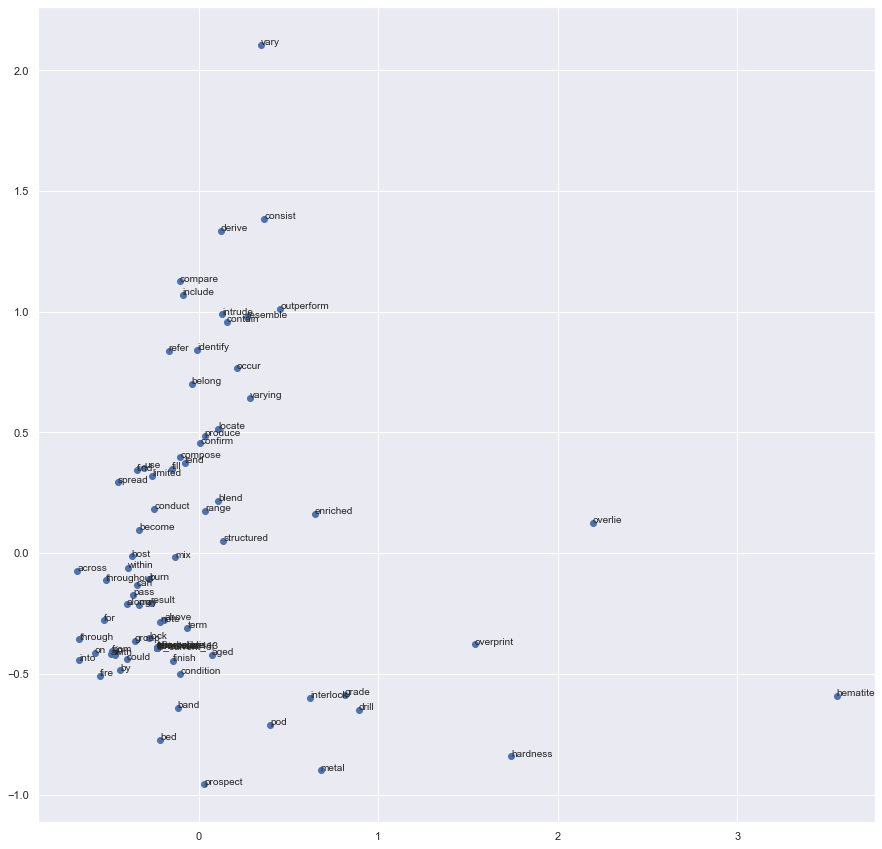

In [101]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from matplotlib.pyplot import figure
from gensim.models import KeyedVectors

model = gensim.models.KeyedVectors.load_word2vec_format('Files/GoogleNews-vectors-negative300.bin.gz', binary=True)
#model = KeyedVectors.load_word2vec_format("glove.6B.300d.txt", binary=False)
print('Vocabulary size (pre-trained model) = ', len(model.vocab))

print(model.similar_by_word('contain'))
print(model.similar_by_word('compare'))
print(model.most_similar('host'))

# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)
print('Vocabulary size (model_1) = ', len(model_1.vocab))
"""
# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
figure(figsize=(15,15))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
"""
#******************* Load pre-trained word embedding *******************
model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentences)
print('Vocabulary size (model_2) = ', len(model_2.vocab))
total_examples = model_2.corpus_count
print('Total_examples = ', total_examples)

model_2.build_vocab([list(model.vocab.keys())], update=True)
### Merge the input-hidden weight matrix from the original C word2vec-tool format given, where it intersects with the current vocabulary.
# the default value of 0.0 prevents further updating of the vector during subsequent training. Use 1.0 to allow further training updates of merged vectors.
#model_2.intersect_word2vec_format("glove.6B.300d.txt", binary=False, lockf=1.0)
model_2.intersect_word2vec_format("Files/GoogleNews-vectors-negative300.bin.gz", binary=True, unicode_errors='ignore', lockf=0.0) # lockf=1.0
print('Train on examples ...')
model_2.train(sentences, total_examples=total_examples, epochs=model_2.iter)
print('Vocabulary size (model_2) after intersect/train = ', len(model_2.vocab))

# fit a 2d PCA model to the vectors
X = model_2[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print('X[0:3] = ', X[0:3])

# create a scatter plot of the projection
figure(figsize=(15,15))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from matplotlib.pyplot import figure
from gensim.models import KeyedVectors

# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)
print('Vocabulary size (model_1) = ', len(model_1.vocab))

#******************* Load pre-trained word embedding *******************
model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentences)
print('Vocabulary size (model_2) = ', len(model_2.vocab))
total_examples = model_2.corpus_count
print('Total_examples = ', total_examples)

model_2.build_vocab([list(model.vocab.keys())], update=True)
### Merge the input-hidden weight matrix from the original C word2vec-tool format given, where it intersects with the current vocabulary.
# the default value of 0.0 prevents further updating of the vector during subsequent training. Use 1.0 to allow further training updates of merged vectors.
#model_2.intersect_word2vec_format("glove.6B.300d.txt", binary=False, lockf=1.0)
model_2.intersect_word2vec_format("Files/GoogleNews-vectors-negative300.bin.gz", binary=True, unicode_errors='ignore', lockf=0.0) # lockf=1.0
print('Train on examples ...')
model_2.train(sentences, total_examples=total_examples, epochs=model_2.iter)
print('Vocabulary size (model_2) after intersect/train = ', len(model_2.vocab))

# fit a 2d PCA model to the vectors
X = model_2[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print('X[0:3] = ', X[0:3])

# create a scatter plot of the projection
figure(figsize=(15,15))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# create a scatter plot of the projection
figure(figsize=(25,25))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
plt.savefig(('verbs_plot.png')

In [103]:
# Save the model
model_name = "model_2.w2v";
model_2.save(model_name);
# Load the model
model_loaded = word2vec.Word2Vec.load('model_2.w2v');

# obtain the Word Vectors for each word in the vocab, stored in a variable called 'syn0'
Z = model_loaded.wv.syn0;
print(Z[0].shape)
Z[0]

# a 100-element vector with values updated after training the neural network model.
# analyze the results of the algorithms in different ways, to see what we can do with Word2Vec. 
# The first thing we will do is cluster the words using KMeans.
# Since the Words are represented as vectors, applying KMeans is easy to do since the clustering algorithm 
# will simply look at differences between vectors (and centers).

def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    y_kmeans = kmeans_clustering.fit_predict(word_vectors);
    
    plt.scatter(word_vectors[:, 0], word_vectors[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    return kmeans_clustering.cluster_centers_, word_vectors;

centers, clusters = clustering_on_wordvecs(Z, 30);
centroid_map = dict(zip(model_loaded.wv.index2word, clusters));

/Users/majiga/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


(300,)


KeyboardInterrupt: 

In [ ]:
# Next, we get words in each cluster that are closest to the cluster center. To do this, 
# we initialize a KDTree on the word vectors, and query it for the Top K words on each cluster center.
# Using the Index 2 word dictionary, we than correspond each word vector back to it's original word representation and 
# add them to a dataframe for easier printing.
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

top_words = get_top_words(model.wv.index2word, 20, centers, Z);
top_words

In [ ]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')
    
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(50):
    col = next(cmaps);
    display_cloud(i+1, col)

In [ ]:
# What else can we do with Word Vectors? Gensim provides some built in functions for us to play with. 
# We can use analogies to see word associations. For instance, King is to Woman as Queen is to _ , we get
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]
    
get_word_table(model.wv.most_similar_cosmul(positive=['king', 'woman'], negative=['queen']), 'Analogy')

In [ ]:
model.wv.doesnt_match("apple microsoft samsung tesla".split())

In [ ]:
keys = ['musk', 'modi', 'hodor', 'martell', 'apple', 'neutrality', 'snowden', 'batman', 'hulk', 'warriors', 'falcons', 'pizza', ];
tables = [];
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key), key, show_sim=False))

pd.concat(tables, axis=1)

In [ ]:
print('Total time: ' + str((time.time() - start)) + ' secs')

Results show how effective Word Vectors are in understanding context between words. We see that the algorithm is easily able to identify words that are based on similar concepts, even though they are less likely to appear in the same sentences. The reason for this is because these words are more likely to have similar labels, which forces their vectors to train into values that can predict those labels correctly.

These results show how effective Word Vectors are in understanding context between words. We can see that the model is easily able to find names of other people commonly associated with "Elon Musk" in the first column, or those associated with the Indian Prime Minister Modi in the 2nd column.

In keeping with the Game of Thrones theme, when I pass in "Hodor", we see the names of other people from the North like Benjen, Bran, Meera, and Craster, but passing in "Martell" gives names of other houses in Westeros instead like Mormont and Tully.

The word "Neutrality" shows some interesting results, words that describe how Reddit feels about Net Neutrality, such as with "privatization", "censorship", and "ttip" (the Transatlantic trade and investment partnership), and "Snowden" has words like whistleblower, assange, and nsa.